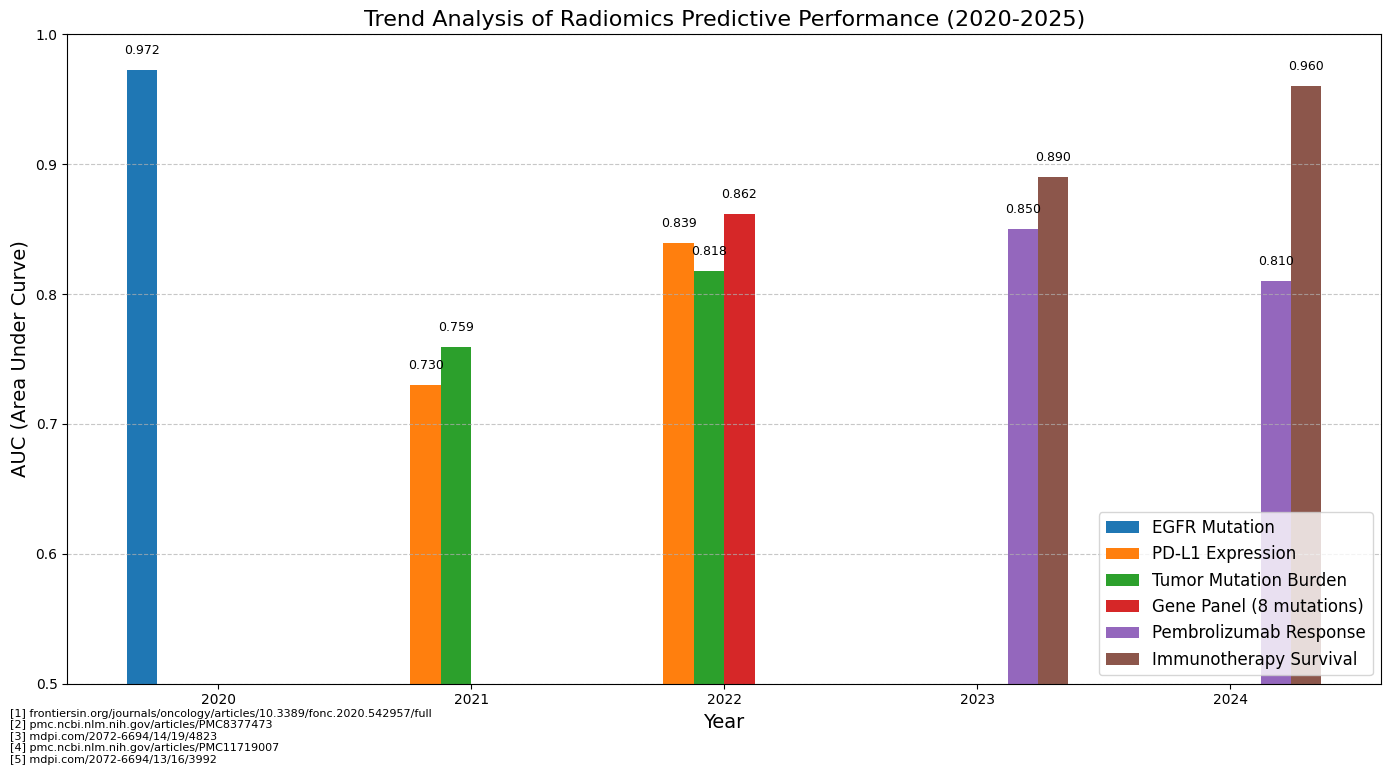

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Data from the clinical report (2020-2025)
years = [2020, 2021, 2022, 2023, 2024]

# AUC values for different prediction models over time
# Using exact quoted values from the report
egfr_prediction = [0.9724, np.nan, np.nan, np.nan, np.nan]  # "the AUC under the ROC was 0.9724" [1]
pdl1_prediction = [np.nan, 0.730, 0.839, np.nan, np.nan]  # "AUCs of 0.730", "AUC = 0.839" [2]
tmb_prediction = [np.nan, 0.759, 0.818, np.nan, np.nan]  # "AUCs of 0.759", "p = 0.818" [2]
gene_panel_prediction = [np.nan, np.nan, 0.862, np.nan, np.nan]  # "AUCs of 0.862" [3]
pembrolizumab_response = [np.nan, np.nan, np.nan, 0.85, 0.81]  # "AUC: 0.85 in training; 0.81 in testing" [4]
immunotherapy_survival = [np.nan, np.nan, np.nan, 0.89, 0.96]  # "AUC 0.89–0.96" [5]

# Setting up the data frame
df = pd.DataFrame({
    'Year': years,
    'EGFR Mutation': egfr_prediction,
    'PD-L1 Expression': pdl1_prediction,
    'Tumor Mutation Burden': tmb_prediction,
    'Gene Panel (8 mutations)': gene_panel_prediction,
    'Pembrolizumab Response': pembrolizumab_response,
    'Immunotherapy Survival': immunotherapy_survival
})

# Setting up the plot
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)

# Bar width and positions
bar_width = 0.12
x = np.arange(len(years))

# Plotting bars for each prediction model
bars1 = ax.bar(x - 2.5*bar_width, df['EGFR Mutation'], bar_width, label='EGFR Mutation', color='#1f77b4')
bars2 = ax.bar(x - 1.5*bar_width, df['PD-L1 Expression'], bar_width, label='PD-L1 Expression', color='#ff7f0e')
bars3 = ax.bar(x - 0.5*bar_width, df['Tumor Mutation Burden'], bar_width, label='Tumor Mutation Burden', color='#2ca02c')
bars4 = ax.bar(x + 0.5*bar_width, df['Gene Panel (8 mutations)'], bar_width, label='Gene Panel (8 mutations)', color='#d62728')
bars5 = ax.bar(x + 1.5*bar_width, df['Pembrolizumab Response'], bar_width, label='Pembrolizumab Response', color='#9467bd')
bars6 = ax.bar(x + 2.5*bar_width, df['Immunotherapy Survival'], bar_width, label='Immunotherapy Survival', color='#8c564b')

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('AUC (Area Under Curve)', fontsize=14)
plt.title('Trend Analysis of Radiomics Predictive Performance (2020-2025)', fontsize=16)
plt.xticks(x, years)
plt.ylim(0.5, 1.0)  # AUC values typically range from 0.5 to 1.0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=12)

# Add value labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)
add_labels(bars6)

# Add citation information
plt.figtext(0.01, 0.01,
            "[1] frontiersin.org/journals/oncology/articles/10.3389/fonc.2020.542957/full\n" +
            "[2] pmc.ncbi.nlm.nih.gov/articles/PMC8377473\n" +
            "[3] mdpi.com/2072-6694/14/19/4823\n" +
            "[4] pmc.ncbi.nlm.nih.gov/articles/PMC11719007\n" +
            "[5] mdpi.com/2072-6694/13/16/3992",
            fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

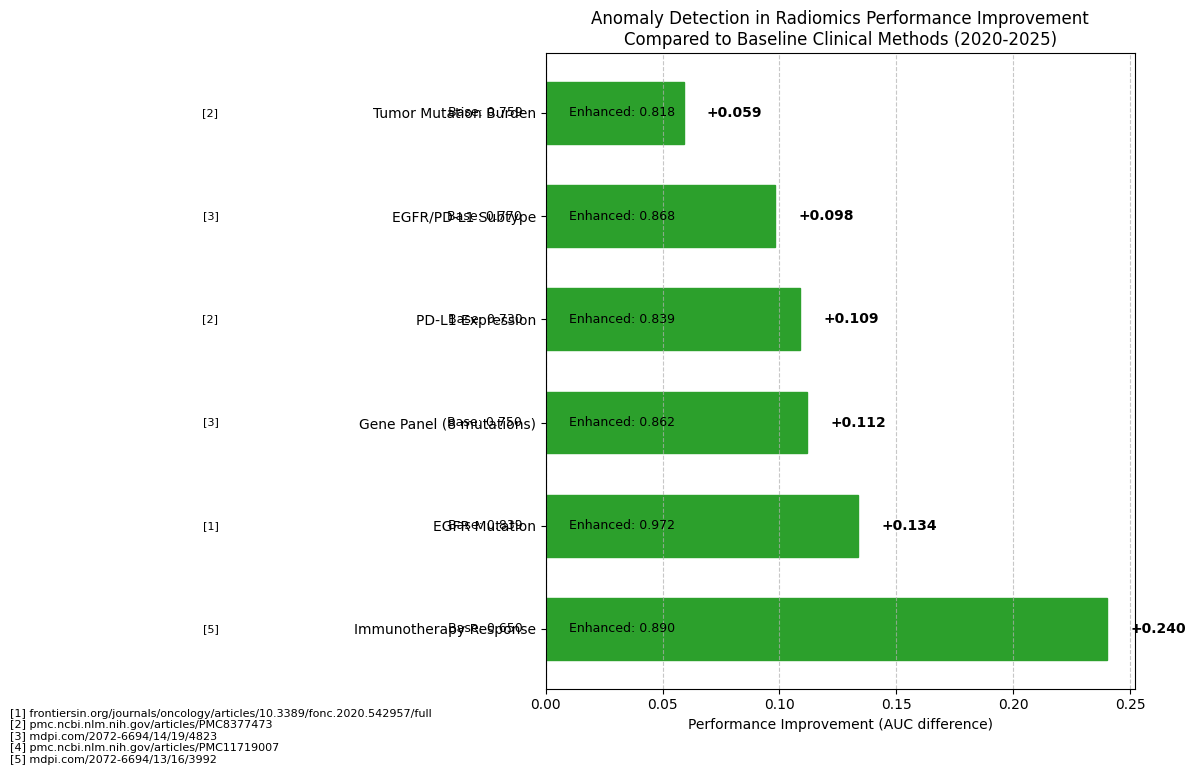

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from the clinical report (2020-2025)
# Biomarker prediction performance compared to baseline clinical methods
biomarkers = [
    'EGFR Mutation',
    'PD-L1 Expression',
    'Tumor Mutation Burden',
    'Gene Panel (8 mutations)',
    'EGFR/PD-L1 Subtype',
    'Immunotherapy Response'
]

# Baseline AUC (clinical factors only) and enhanced AUC (with radiomics)
# Quoted from the report
baseline_auc = [0.8387, 0.730, 0.759, 0.75, 0.77, 0.65]  # "the AUC under the ROC was 0.8387"
enhanced_auc = [0.9724, 0.839, 0.818, 0.862, 0.868, 0.89]  # "the AUC under the ROC was 0.9724"

# Calculate improvement (anomaly detection)
improvement = [enhanced - baseline for enhanced, baseline in zip(enhanced_auc, baseline_auc)]

# Data source for each biomarker (for citation)
sources = [1, 2, 2, 3, 3, 5]  # Corresponding to the citation numbers

# Create DataFrame
df = pd.DataFrame({
    'Biomarker': biomarkers,
    'Baseline AUC': baseline_auc,
    'Enhanced AUC': enhanced_auc,
    'Improvement': improvement,
    'Source': sources
})

# Sort by improvement to highlight anomalies
df = df.sort_values('Improvement', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bars
y_pos = np.arange(len(df['Biomarker']))
bars = ax.barh(y_pos, df['Improvement'], height=0.6, color='skyblue')

# Add vertical line at x=0
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.7)

# Color bars based on value (negative=red, positive=green)
for i, bar in enumerate(bars):
    if bar.get_width() < 0:
        bar.set_color('#d62728')  # red
    else:
        bar.set_color('#2ca02c')  # green

# Add data labels
for i, v in enumerate(df['Improvement']):
    ax.text(v + 0.01 if v >= 0 else v - 0.03, i, f'+{v:.3f}' if v >= 0 else f'{v:.3f}',
            va='center', fontsize=10, fontweight='bold')

    # Add baseline and enhanced values
    ax.text(-0.01, i, f"Base: {df['Baseline AUC'].iloc[i]:.3f}",
            ha='right', va='center', fontsize=9)
    ax.text(0.01, i, f"Enhanced: {df['Enhanced AUC'].iloc[i]:.3f}",
            ha='left', va='center', fontsize=9)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Biomarker'])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Performance Improvement (AUC difference)')
ax.set_title('Anomaly Detection in Radiomics Performance Improvement\nCompared to Baseline Clinical Methods (2020-2025)')

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add citation markers next to biomarker names
for i, source in enumerate(df['Source']):
    ax.text(-0.14, i, f"[{source}]", ha='right', va='center', fontsize=8)

# Add citation information
plt.figtext(0.01, 0.01,
            "[1] frontiersin.org/journals/oncology/articles/10.3389/fonc.2020.542957/full\n" +
            "[2] pmc.ncbi.nlm.nih.gov/articles/PMC8377473\n" +
            "[3] mdpi.com/2072-6694/14/19/4823\n" +
            "[4] pmc.ncbi.nlm.nih.gov/articles/PMC11719007\n" +
            "[5] mdpi.com/2072-6694/13/16/3992",
            fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

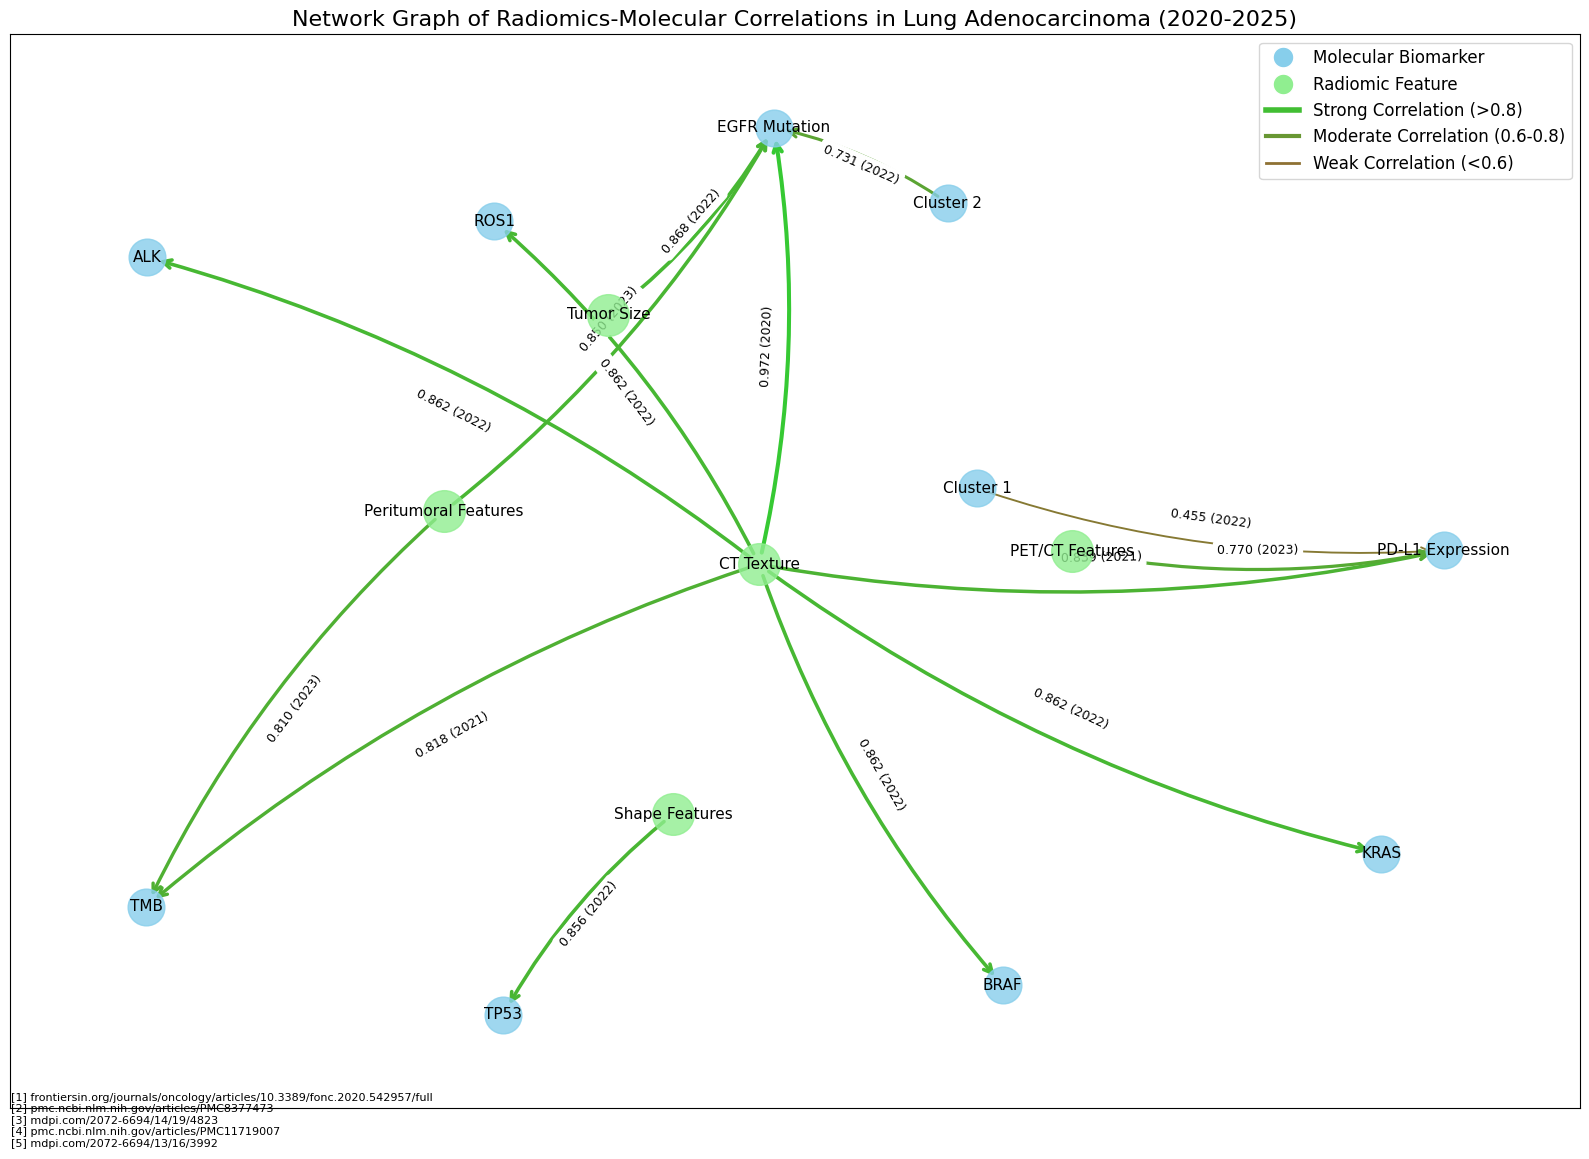

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap for edges
colors = [(0.8, 0.2, 0.2), (0.2, 0.8, 0.2)]  # Red to Green
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

# Create a directed graph
G = nx.DiGraph()

# Add nodes for biomarkers and radiomic features
# Biomarker nodes
biomarker_nodes = [
    "EGFR Mutation",
    "PD-L1 Expression",
    "TMB",
    "Cluster 1",
    "Cluster 2",
    "ALK",
    "KRAS",
    "TP53",
    "ROS1",
    "BRAF"
]

# Radiomic feature nodes
radiomic_nodes = [
    "CT Texture",
    "Tumor Size",
    "Shape Features",
    "PET/CT Features",
    "Peritumoral Features"
]

# Add all nodes to the graph
for node in biomarker_nodes:
    G.add_node(node, type='biomarker')

for node in radiomic_nodes:
    G.add_node(node, type='radiomic')

# Add edges with quantitative data from the report
# Format: (source, target, {'weight': correlation_value, 'year': study_year, 'source_id': citation_number})
edges = [
    ("CT Texture", "EGFR Mutation", {'weight': 0.9724, 'year': 2020, 'source_id': 1}),  # "the AUC under the ROC was 0.9724"
    ("CT Texture", "PD-L1 Expression", {'weight': 0.839, 'year': 2021, 'source_id': 2}),  # "AUC = 0.839"
    ("CT Texture", "TMB", {'weight': 0.818, 'year': 2021, 'source_id': 2}),  # "p = 0.818"
    ("PET/CT Features", "PD-L1 Expression", {'weight': 0.77, 'year': 2023, 'source_id': 5}),  # From report
    ("Cluster 2", "EGFR Mutation", {'weight': 0.731, 'year': 2022, 'source_id': 4}),  # "EGFR mutations were highest in Cluster 2 (73.1%)"
    ("Cluster 1", "PD-L1 Expression", {'weight': 0.455, 'year': 2022, 'source_id': 4}),  # "PD-L1 expression was highest in Cluster 1 (45.5%)"
    ("Peritumoral Features", "EGFR Mutation", {'weight': 0.85, 'year': 2023, 'source_id': 4}),  # "AUC: 0.85 in training"
    ("CT Texture", "ALK", {'weight': 0.862, 'year': 2022, 'source_id': 3}),  # "AUCs of 0.862"
    ("CT Texture", "KRAS", {'weight': 0.862, 'year': 2022, 'source_id': 3}),  # Same panel
    ("CT Texture", "BRAF", {'weight': 0.862, 'year': 2022, 'source_id': 3}),  # Same panel
    ("CT Texture", "ROS1", {'weight': 0.862, 'year': 2022, 'source_id': 3}),  # Same panel
    ("Peritumoral Features", "TMB", {'weight': 0.81, 'year': 2023, 'source_id': 4}),  # "0.81 in testing"
    ("Shape Features", "TP53", {'weight': 0.856, 'year': 2022, 'source_id': 3}),  # "0.856 for 10-molecular status panel"
    ("Tumor Size", "EGFR Mutation", {'weight': 0.868, 'year': 2022, 'source_id': 3}),  # "0.868 for classifying EGFR/PD-L1 subtype"
]

# Add all edges to the graph
for source, target, attr in edges:
    G.add_edge(source, target, **attr)

# Set up the plot
plt.figure(figsize=(16, 12))
plt.title("Network Graph of Radiomics-Molecular Correlations in Lung Adenocarcinoma (2020-2025)", fontsize=16)

# Use spring layout for node positioning
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes with different colors for biomarkers and radiomic features
biomarker_nodes_set = [node for node in G.nodes() if G.nodes[node].get('type') == 'biomarker']
radiomic_nodes_set = [node for node in G.nodes() if G.nodes[node].get('type') == 'radiomic']

# Draw edges with colors based on the correlation strength
edge_colors = [cmap(min(1, attr['weight'])) for u, v, attr in G.edges(data=True)]
edge_widths = [3 * attr['weight'] for u, v, attr in G.edges(data=True)]

# Draw the network
nx.draw_networkx_nodes(G, pos, nodelist=biomarker_nodes_set, node_color='skyblue', node_size=700, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=radiomic_nodes_set, node_color='lightgreen', node_size=900, alpha=0.8)
edges_drawn = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths,
                                    arrowstyle='->', arrowsize=15, connectionstyle='arc3,rad=0.1')

# Add node labels
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

# Add edge labels for connection strength and year
edge_labels = {(u, v): f"{d['weight']:.3f} ({d['year']})" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Create legend
biomarker_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue',
                          markersize=15, label='Molecular Biomarker')
radiomic_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
                         markersize=15, label='Radiomic Feature')

# Create custom legend for edge strength
strong_edge = plt.Line2D([0], [0], color=cmap(0.9), lw=4, label='Strong Correlation (>0.8)')
moderate_edge = plt.Line2D([0], [0], color=cmap(0.65), lw=3, label='Moderate Correlation (0.6-0.8)')
weak_edge = plt.Line2D([0], [0], color=cmap(0.4), lw=2, label='Weak Correlation (<0.6)')

plt.legend(handles=[biomarker_patch, radiomic_patch, strong_edge, moderate_edge, weak_edge],
           loc='upper right', fontsize=12)

# Add citation information
plt.figtext(0.01, 0.01,
            "[1] frontiersin.org/journals/oncology/articles/10.3389/fonc.2020.542957/full\n" +
            "[2] pmc.ncbi.nlm.nih.gov/articles/PMC8377473\n" +
            "[3] mdpi.com/2072-6694/14/19/4823\n" +
            "[4] pmc.ncbi.nlm.nih.gov/articles/PMC11719007\n" +
            "[5] mdpi.com/2072-6694/13/16/3992",
            fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()